In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from scipy import optimize
%matplotlib inline

In [2]:
data = loadmat('ex3data1.mat')

In [3]:
X = data['X'] #5000x400.
intNumSamples = X.shape[0]
'''
Add column for bias term.
'''
X = np.insert(X,0,np.ones(intNumSamples),axis =1) #5000x401.
y = data['y'] #5000x1.

(-0.5, 199.5, 19.5, -0.5)

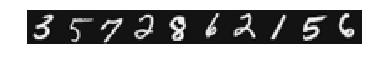

In [4]:
intRandRows = np.random.choice(X.shape[0],10)
'''
reshape(-1,20) rolls each 1x400 row back into a 20x20 grid.
we can plot these as an image since each grid is a 20x20 grid of grayscale pixel values.
'''
plt.imshow(X[intRandRows,1:].reshape(-1,20).T, cmap = 'gray')
plt.axis('off')

In [5]:
class MulticlassClassification:
    def __init__(self):
        pass
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    def getCost(self,theta,X,y,regFactor = 0):
        theta = np.matrix(theta)
        hypothesis = self.sigmoid(np.dot(X,theta.T))
        intNumSamples = X.shape[0]
        J = -(np.dot(y.T,(np.log(hypothesis))) + np.dot((1-y).T,np.log(1-hypothesis)))/intNumSamples
        '''
        Don't add theta0.
        '''
        R = np.sum(np.square(theta[1:,0]))*regFactor/2/intNumSamples
        J += R
        self.cost = np.array(J)
        return self.cost
    def getGrad(self,theta,X,y,regFactor = 0):
        theta = np.matrix(theta)
        intNumSamples = X.shape[0]
        hypothesis = self.sigmoid(np.dot(X,theta.T))
        error = hypothesis -y
        tempTheta =np.copy(theta)

        tempTheta[:,0] = 0
        '''
        Don't regularize theta0.
        '''
        grad =  np.dot(X.T,error)/intNumSamples + tempTheta.T*regFactor/intNumSamples
        self.grad = np.array(grad).ravel()
        return self.grad
    def minimizeCost(self,theta,X,y,regFactor, optMethod=None):
        self.fmin = optimize.minimize(fun=self.getCost,x0=theta,method = optMethod,jac = self.getGrad,args=(X,y,regFactor))
        return self.fmin
    def oneVsAll(self,X,y,numLabels,regFactor,optMethod= None):

        numFeatures = X.shape[1]
        self.allTheta = np.zeros((numLabels,numFeatures))
        '''
        Note we are starting at one because 0 is labeled as 10 in the training set.
        The values are 0-9, but the labels are 1-10.
        '''
        for i in range(1,numLabels+1):
            tempY = np.matrix([1 if label==i else 0 for label in y]).T
            tempTheta = np.zeros(numFeatures)
            fmin = self.minimizeCost(tempTheta,X,tempY,regFactor,optMethod)
            self.allTheta[i-1,:] = fmin['x']
            print('Training complete for label ' + str(i) + ' | Cost: ' + str(fmin['fun'][0]))
        return self.allTheta
    def predictOneVsAll(self,X,y,allTheta):
        hypothesis = self.sigmoid(np.dot(X,allTheta.T))
        '''
        Remember that labels go from 1 - 10.
        '''
        allPredictions = np.argmax(hypothesis,axis =1) +1
        self.predictionAccuracy = round(100*np.mean(allPredictions == y.ravel()),2)
        return self.predictionAccuracy
    def predictNN(self,X,y,theta1,theta2):
        numSamples,numInputNeurons = X.shape
        numHiddenNeurons = theta1.shape[0] #not including bias hidden neuron.
        numOutputNeurons = theta2.shape[0]
        '''
        Forward propagate.
        '''
        a1 = X
        z2 = np.dot(a1,theta1.T)
        a2 = self.sigmoid(z2)
        a2 = np.insert(a2,0,np.ones(numSamples),axis =1)
        z3 = np.dot(a2,theta2.T)
        hypothesis = self.sigmoid(z3)
        '''
        Remember that labels go from 1 - 10.
        '''
        allPredictions = np.argmax(hypothesis, axis =1) +1
        self.predictionAccuracyNN = round(100*np.mean(allPredictions == y.ravel()),2)
        return self.predictionAccuracyNN

In [6]:
regFactor = 0.1
numLabels = 10
optMethod = 'TNC'

model = MulticlassClassification()
theta = model.oneVsAll(X,y,numLabels,regFactor,optMethod)
predictionAccuracy = model.predictOneVsAll(X,y,theta)

print('\nPrediction accuracy: ' + str(predictionAccuracy) + '%.')
print('Note that we used the %s optimization algorithm to minimize the cost function.' %(optMethod))

Training complete for label 1 | Cost: [0.0079651]
Training complete for label 2 | Cost: [0.04443504]
Training complete for label 3 | Cost: [0.052425]
Training complete for label 4 | Cost: [0.02605872]
Training complete for label 5 | Cost: [0.04708875]
Training complete for label 6 | Cost: [0.01176083]
Training complete for label 7 | Cost: [0.0245279]
Training complete for label 8 | Cost: [0.07406359]
Training complete for label 9 | Cost: [0.0653737]
Training complete for label 10 | Cost: [0.00585873]

Prediction accuracy: 96.46%.
Note that we used the TNC optimization algorithm to minimize the cost function.


In [7]:
weights = loadmat('ex3weights.mat')
theta1 = weights['Theta1']
theta2 = weights['Theta2']

print(theta1.shape)
print(theta2.shape)

(25, 401)
(10, 26)


In [8]:
predictionAccuracyNN = model.predictNN(X,y,theta1,theta2)
print('Prediction accuracy using neural network: ' + str(predictionAccuracyNN) + '%.')

Prediction accuracy using neural network: 97.52%.
